In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
# Load the dataset
data = pd.read_csv('/Users/omkarkalekar/Downloads/student_data.csv')

# Display basic information about the dataset
display(data.head())
print(data.info())

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


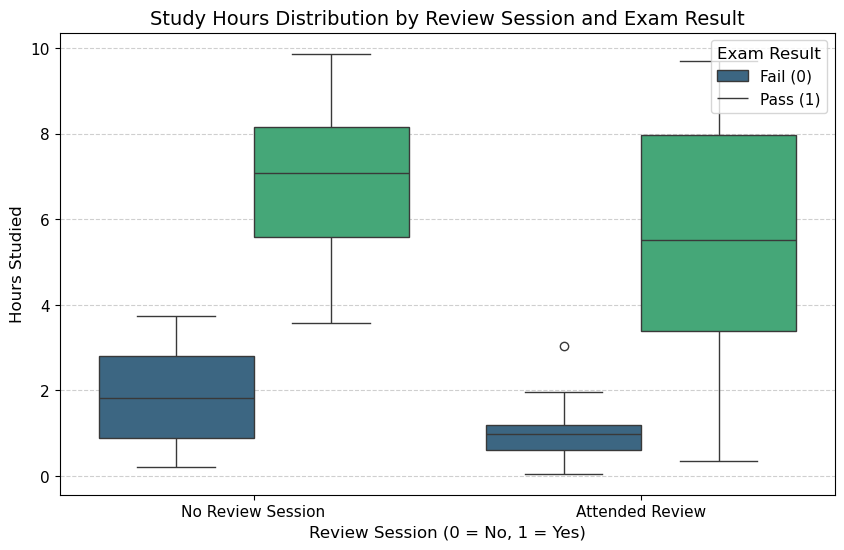

In [22]:
# Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, 
    x='Review_Session', 
    y='Hours_Studied', 
    hue='Results', 
    palette='viridis'  # Different color scheme for variety
)

# Improve readability
plt.title('Study Hours Distribution by Review Session and Exam Result', fontsize=14)
plt.xlabel('Review Session (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Review Session', 'Attended Review'], fontsize=11)
plt.yticks(fontsize=11)

# Customize legend
plt.legend(title='Exam Result', labels=['Fail (0)', 'Pass (1)'], fontsize=11, title_fontsize=12, loc='upper right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()



In [10]:
# Logistic Regression Model
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=200, random_state=42)
model.fit(X, y)

LogisticRegression(max_iter=200, random_state=42, solver='liblinear')

In [12]:
# Model Coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [-2.77870623]
Coefficients: [[0.92519784 1.10466804]]


In [16]:
# Model Predictions
predictions = model.predict(X)

# Accuracy

accuracy = accuracy_score(y, predictions)
print('Accuracy is:', accuracy*100, '%')

Accuracy is: 90.0 %


AUC: 0.9738051470588236


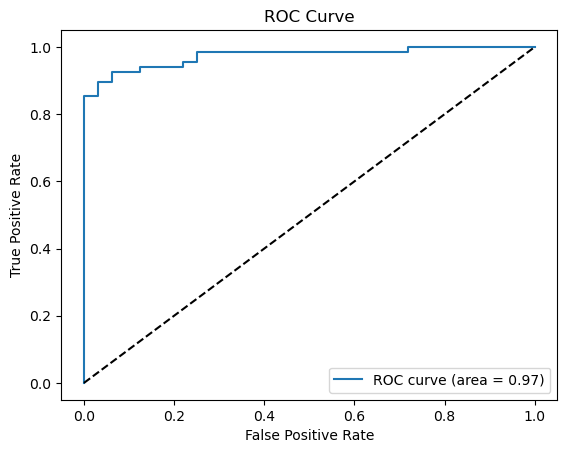

In [20]:
# ROC and AUC
probabilities = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, probabilities)
print('AUC:', auc)

fpr, tpr, _ = roc_curve(y, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
